In [1]:
#Starter: Nintendo Business Analysis
#Quick load + first look at the VG Sales dataset.
#Tasks: load data, show top Nintendo titles, compare global sales by major publishers (Nintendo, Sony, Microsoft) and regional breakdown

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Display settings

pd.options.display. max_columns = 200
sns.set(style ="whitegrid")
%matplotlib inline

In [21]:
#Adjust data pathway
import os
print(os.getcwd())

%cd "C:\Users\marti\Video-Game-Sales-on-a-Global-Scale\notebooks"
GITHUB_RAW = "https://raw.githubusercontent.com/mjg377/Video-Game-Sales-on-a-Global-Scale/main/data/vgsales.csv"
df = pd.read_csv(GITHUB_RAW)


df=pd.read_csv(GITHUB_RAW)
print("Shape:", df.shape)

df.head()

C:\Users\marti\Video-Game-Sales-on-a-Global-Scale\notebooks
C:\Users\marti\Video-Game-Sales-on-a-Global-Scale\notebooks
Shape: (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#Column names and types
print (df.dtypes)

#Ensure column types are similar, especially the values for sales in regions

sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for c in sales_cols:
    if c in df.columns:
        df[c]= pd.to_numeric(df[c])

#Check for any Null values in the remaining columns 
df[sales_cols + ['Name','Platform','Year','Genre','Publisher']].isnull().sum()



Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
dtype: int64

In [5]:
# It seems there were 271 null values in Years and 58 is publishers, I have to choose which data to keep and remove.
#I will use an 'unknown' placeholder instead for the publishers and remove the years since time series analysis will be performed later

df = df.dropna(subset=['Year'])
df['Publisher']=df['Publisher'].fillna('Unknown')

#I converted the 'Year' column to an integer data type so it looks more presentable
df['Year']=df['Year'].astype(int)
#Double Check to see if they any null values were removed. 
df[sales_cols + ['Name','Platform','Year','Genre','Publisher']].isnull().sum()


NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
dtype: int64

In [6]:
#Now, we filter Nintendo titles based on Publisher name or Name (Nintendo sometimes uses itself as the publisher also)


nintendo_df = df[df['Publisher'].str.contains('Nintendo',na=False, case= False)]
nintendo_top5 = nintendo_df.sort_values('Global_Sales', ascending=False).head(10)[['Name','Platform','Year','Genre', 'Publisher','Global_Sales']]
nintendo_top5.reset_index(drop=True, inplace=True)
nintendo_top5.style.format({'Global_Sales':'{:.2f}'})



,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


In [7]:
#Now that we have the top 10 Publishers for Nintendo, we will now separate the three main ones, Nintendo, Sony and Microsoft
separated_publishers = ['Nintendo', 'Sony', 'Microsoft']

#Since some publishers show with slight different variations of naming; we'll match case-sensitive using contains
#We will will create a function where we take the total sales of the three publisher listed above.
def total_sales_for_publishers(df, pub_keyword):
    mask=df['Publisher'].str.contains(pub_keyword, na=False, case=False)
    return round(float(df.loc[mask,'Global_Sales'].sum()),2)
publisher_totals= {pub:total_sales_for_publishers(df,pub) for pub in separated_publishers}
publisher_totals  




{'Nintendo': 1784.43, 'Sony': 636.02, 'Microsoft': 245.79}

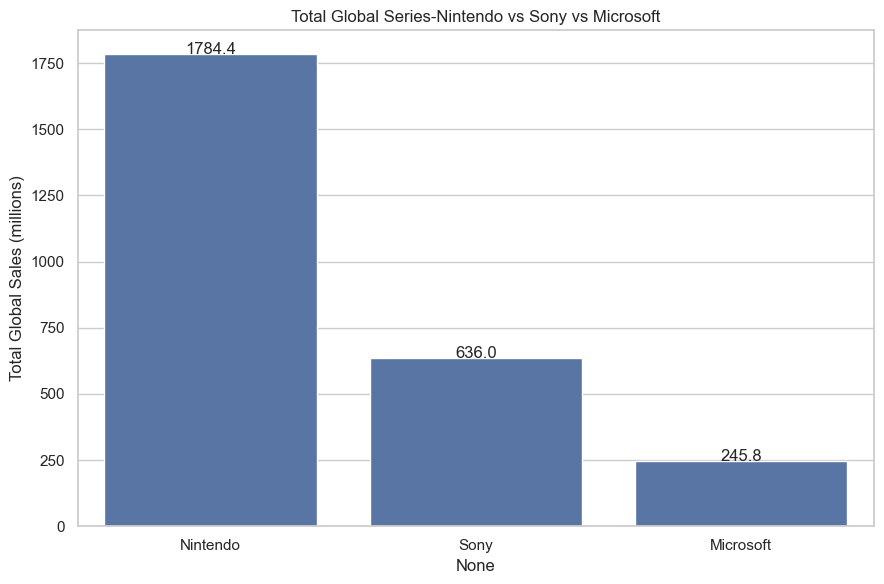

In [8]:
#Now that we have Nintendo, Sony, and Microsoft total sales, we can now chart these for visual comparison
#We add the titles and labels respectively to their data.
publish_totals_series=pd.Series(publisher_totals).sort_values(ascending=False)
plt.figure(figsize=(9,6))
sns.barplot(x=publish_totals_series.index, y=publish_totals_series.values)
plt.ylabel('Total Global Sales (millions)')
plt.title('Total Global Series-Nintendo vs Sony vs Microsoft')
for i, v in enumerate (publish_totals_series.values):
    plt.text(i,v + 0.5, f"{v:.1f}", ha ='center')
plt.tight_layout()
plt.show()


In [9]:
#Now that we created the bar graphs with all three major publisher sales, we can now take Nintendo's regional performances.
def regional_sales_by_publisher(df, pub_keyword):
    mask = df['Publisher'].str.contains(pub_keyword, na=False, case=False)
    regs=df.loc[mask, sales_cols].sum()
    return regs
regional = pd.DataFrame({pub: regional_sales_by_publisher(df, pub) for pub in separated_publishers}).T
regional.index.name = 'Publisher'
regional
#Here we can see that in every regional sales chart, Nintendo takes the lead in sales.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Sony,277.18,197.70,76.74,84.35,636.02
Microsoft,155.35,68.61,3.26,18.56,245.79


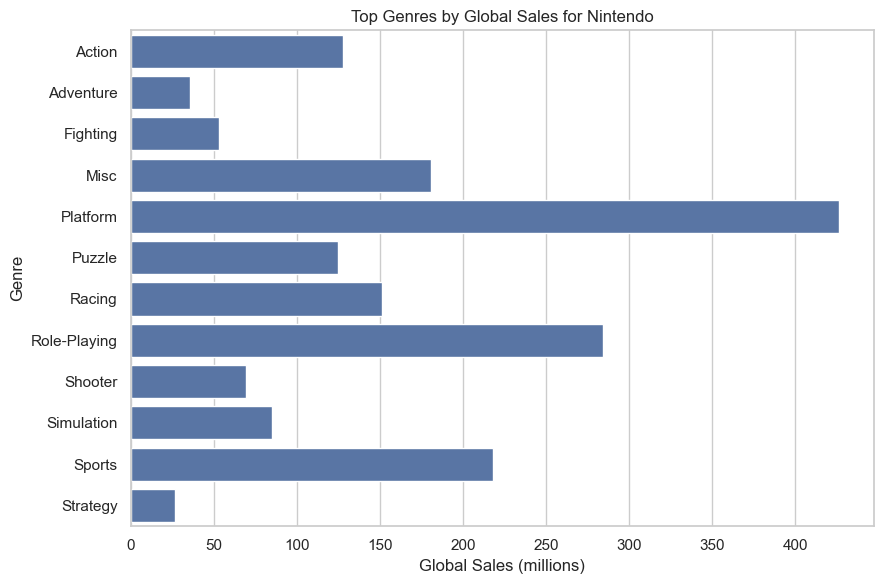

In [10]:
#Now that we know that overall, Nintendo leads in sales, we now look into which genres perform well with Nintendo sales
#Code block 45 contains the Nintendo df that was created to look at its specific data
if 'Genre' in nintendo_df.columns:
    genre_counts= nintendo_df.groupby('Genre')['Global_Sales'].sum()
    plt.figure(figsize= (9,6))
    sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.xlabel('Global Sales (millions)')
    plt.title('Top Genres by Global Sales for Nintendo')
    plt.tight_layout()
    plt.show()
else: 
    print("Genre column not found.") # We use this since there are some 'Unknown values that were added in the data ealier.
    




In [25]:
#Cleaned Nintendo-only csv for faster reloads.
import os
print(os.getcwd())
nintendo_df.to_csv('../data/nintendo_vgsales_clean.csv', index=False)
print("Saved../data/nintendo_vgsales_clean_csv")


C:\Users\marti\Video-Game-Sales-on-a-Global-Scale\notebooks
Saved../data/nintendo_vgsales_clean_csv
